In [ ]:
import tensorflow as tf
import keras as ke
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [ ]:
gpu = tf.config.experimental.list_physical_devices("GPU")

for i in gpu:
  tf.config.experimental

NameError: name 'tf' is not defined

In [ ]:
dta = '/content/drive/MyDrive/Data_sets/SSD'
df = ke.utils.image_dataset_from_directory(dta)
df.map(lambda x, y: (x/255, y))

Found 1 files belonging to 1 classes.


<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

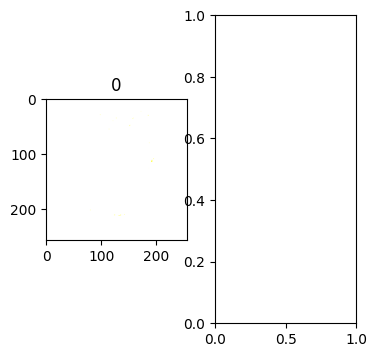

In [ ]:
batch = df.as_numpy_iterator().next()

fig, zx = plt.subplots(ncols = 2, figsize= (4,4))
for idx, img in enumerate(batch[0][:2]):
  zx[idx].imshow(img)
  zx[idx].title.set_text(batch[1][idx])

In [ ]:
train_set = df.take(int(len(df)))

In [ ]:
cnn = ke.models.Sequential([
    ke.layers.Conv2D(input_shape = (256, 256, 3), filters=128, kernel_size=(10, 10), activation= 'relu'),
    ke.layers.MaxPool2D(pool_size=(2,2)),
    ke.layers.Conv2D(activation = 'relu', filters = 256, kernel_size=(7, 7)),
    ke.layers.MaxPool2D(pool_size=(2,2)),
    ke.layers.Conv2D(activation = 'relu', filters = 256, kernel_size=(4, 4)),
    ke.layers.MaxPool2D(pool_size=(2,2)),
    ke.layers.Conv2D(activation='relu', filters=512, kernel_size=(4,4)),
    ke.layers.Flatten(),
   # ke.layers.Dense(1000, activation='relu'),
    ke.layers.Dense(1, activation = 'softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(
    optimizer='SGD',
    loss=tf.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

hist =cnn.fit(train_set, epochs=30)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.0000e+00 - loss: 1.0133
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 12/30


In [ ]:
dta = str(input())
dta = cv.imread(dta)

img = tf.image.resize(dta, (256,256))
img = np.expand_dims(img/255, 0)

cnn.predict(img)

/content/images.jpg


ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [ ]:
if cnn.predict(img) < 0.5:
  print("yes")

else:
  print("No")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
yes


In [ ]:
import tensorflow as tf
import keras as ke
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import os
import imghdr

In [ ]:
dta_dir = '/content/drive/MyDrive/Data_sets/SSD'

In [ ]:
df = ke.utils.image_dataset_from_directory(dta_dir)
df.map(lambda x,y: (x/255, y))

Found 2 files belonging to 2 classes.


<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
batch = df.as_numpy_iterator().next()



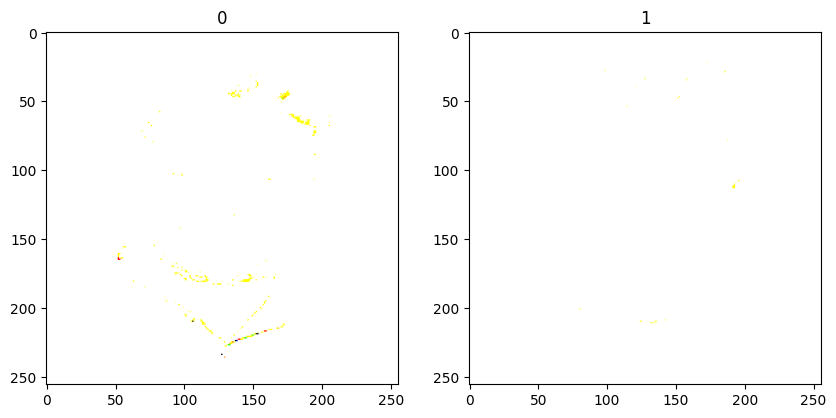

In [ ]:
fig, ax=plt.subplots(ncols=2, figsize=(10,10))
for idx, img in enumerate(batch[0][:2]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
model = ke.models.Sequential([
    ke.layers.Conv2D(input_shape=(256, 256, 3), activation = 'relu', filters= 32, kernel_size=(10,10), kernel_initializer='glorot_uniform'),
    ke.layers.MaxPool2D(pool_size=(2,2)),
    ke.layers.Conv2D(activation='relu', filters = 64, kernel_size=(9,9)),
    ke.layers.MaxPool2D(pool_size=(2,2)),
    ke.layers.Conv2D(activation='relu', filters=64, kernel_size=(8,8)),
    ke.layers.MaxPool2D(pool_size=(2,2)),
    ke.layers.Conv2D(activation = 'relu', filters= 128, kernel_size=(7,7)),
    ke.layers.MaxPool2D(pool_size=(2,2)),
    ke.layers.Conv2D(activation='relu', filters=128, kernel_size=(4,4)),
    ke.layers.MaxPool2D(pool_size=(2, 2)),
    ke.layers.Conv2D(activation = 'relu', filters= 256, kernel_size=(4,4)),
    ke.layers.Flatten(),
    ke.layers.Dense(100, activation = 'relu'),
    ke.layers.Dense(50, activation = 'relu'),
    ke.layers.Dense(25, activation= 'relu'),
    ke.layers.Dense(10, activation='relu'),
    ke.layers.Dense(5, activation='relu'),

    ke.layers.Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer = 'SGD',
    loss = ke.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
model.fit(df, epochs=20)

Epoch 1/20


ValueError: Exception encountered when calling Conv2D.call().

[1mNegative dimension size caused by subtracting 4 from 3 for '{{node sequential_2_1/conv2d_27_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_2_1/max_pooling2d_21_1/MaxPool2d, sequential_2_1/conv2d_27_1/convolution/ReadVariableOp)' with input shapes: [?,3,3,128], [4,4,128,256].[0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(None, 3, 3, 128), dtype=float32)

In [ ]:
dta= str(input())
img = cv.imread(dta)
img = tf.image.resize(img, (256,256))

img = np.expand_dims(img/255, 0)

/content/images.jpg


In [ ]:
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0.]], dtype=float32)